Name: Saleh Abdallah

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

Text Data Preparation

In [2]:
# Load 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data

In [ ]:
# Text processing function
def text_process(text):
    # Remove punctuation
    nopunc = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize & Remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [19]:
# Apply preprocessing to the documents
cleaned_texts = [text_process(text) for text in texts]

Text Representation

In [20]:
# Assign BoW & TFIDF vectorizers
bow_vectorizer = CountVectorizer(max_features=1000)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [25]:
# Vectorization
# Bag of Words
bow = bow_vectorizer.fit_transform(cleaned_texts).astype('float32')
# TF-IDF
tfidf = tfidf_vectorizer.fit_transform(cleaned_texts).astype('float32')

Unsupervised Learning Application

In [26]:
# Apply KMeans to BoW features
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(bow)
# Get predicted cluster labels
cluster_labels_bow = kmeans.labels_

In [27]:
# Apply KMeans to TF-IDF features
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(tfidf)
# Get predicted cluster labels
cluster_labels_tfidf = kmeans.labels_

Model Evaluation and Prediction

In [28]:
# Silhouette score - BoW
# Sample 2000 points randomly
# from sklearn.utils import resample
# X_sample, labels_sample = resample(X, labels, n_samples=2000, random_state=42)

sil_score_bow = silhouette_score(bow, cluster_labels_bow)
print(f'Silhouette Score BoW: {sil_score_bow:.2f}')
sil_score_tfidf = silhouette_score(tfidf, cluster_labels_tfidf)
print(f'Silhouette Score TF-IDF: {sil_score_tfidf:.2f}')

Silhouette Score BoW: 0.82
Silhouette Score TF-IDF: 0.01


In [33]:
# Predict New Documents
new_doc = ['Canada wants new trade partners. But markets like India and China come with major obstacles']
# Apply text_process
cleaned_doc = text_process(new_doc[0])
# Vectorization
vectorized_doc_bow = bow_vectorizer.transform([cleaned_doc]).astype('float32')
vectorized_doc_tfidf = tfidf_vectorizer.transform([cleaned_doc]).astype('float32')
# Prediction
predicted_cluster_bow = kmeans.predict(vectorized_doc_bow)
print(f"BoW - New document Cluster: {predicted_cluster_bow[0]}")
predicted_cluster_tfidf = kmeans.predict(vectorized_doc_tfidf)
print(f"TFIDF - New document Cluster: {predicted_cluster_tfidf[0]}")

BoW - New document Cluster: 7
TFIDF - New document Cluster: 9


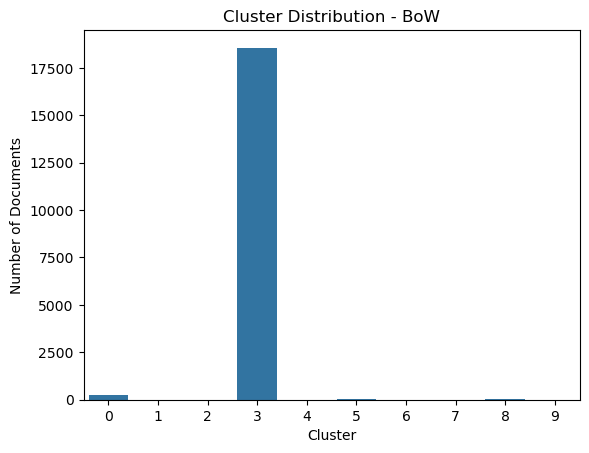

In [34]:
# Visualization - BoW
sns.countplot(x=cluster_labels_bow)
plt.title("Cluster Distribution - BoW")
plt.xlabel("Cluster")
plt.ylabel("Number of Documents")
plt.show()

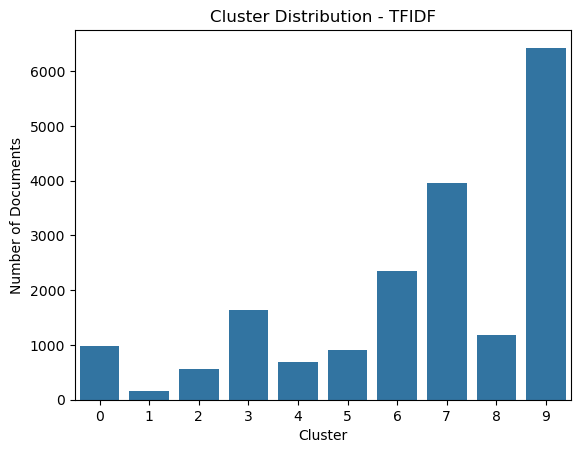

In [35]:
# Visualization - TFIDF
sns.countplot(x=cluster_labels_tfidf)
plt.title("Cluster Distribution - TFIDF")
plt.xlabel("Cluster")
plt.ylabel("Number of Documents")
plt.show()

Reporting and Documentation

* Data Loading: Retrieved raw text data from fetch_20newsgroups.

* Preprocessing: Removed punctuation and stopwords from the documents.

* Vectorization: Used CountVectorizer (BoW) and TfidfVectorizer to numerically represent the text.

* Clustering: Applied KMeans clustering with n_clusters=10.

* Evaluation: Measured cluster quality using Silhouette Score. BoW: 0.82 very good vs TF-IDF: 0.01 very low.

* Prediction:Predicted clusters 7 and 9 for a new document for BoW and TFIDF respectively.

* Visualization: Plotted cluster distributions using seaborn. TFIDF showed a more balanced clustering distribution than BoW which showed that majority of the documentss are in one cluster.